# Making plots with GRASS

Veronica Andreo  
2024-04-25

In previous tutorials we saw examples of how to convert GRASS raster and
vector maps into Python and R objects to perform data analysis and
visualizations. There are some GRASS tools, mostly based in the well
known [matplotlib](https://matplotlib.org/) Python library, that allow
us to create plots for data visualization without the need to explicitly
convert GRASS data. Here are these plotting tools for raster, vector and
time series data within GRASS:

| Raster | Vector | Time series |
|-------------------------|------------------------|------------------------|
| [r.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/r.boxplot.html) | [v.scatterplot](https://grass.osgeo.org/grass-stable/manuals/addons/v.scatterplot.html) | [g.gui.tplot](https://grass.osgeo.org/grass-stable/manuals/g.gui.tplot.html) |
| [r.series.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/r.series.boxplot.html) | [v.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/v.boxplot.html) | [t.rast.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/t.rast.boxplot.html) |
|  | [v.histogram](https://grass.osgeo.org/grass-stable/manuals/addons/v.histogram.html) | [t.rast.line](https://grass.osgeo.org/grass-stable/manuals/addons/t.rast.line.html) |

In this tutorial, we’ll demonstrate their use with maps from the North
Carolina [full
dataset](https://grass.osgeo.org/sampledata/north_carolina/nc_spm_08_grass7.zip).
We’ll also use a special [mapset containing MODIS LST data
products](https://grass.osgeo.org/sampledata/north_carolina/nc_spm_mapset_modis2015_2016_lst_grass8.zip)
to exemplify tools’ usage with time series data. While these tools can
be invoked from the GUI menu or Tools tab, we will show how the GRASS
commands look like so you can run them from the terminal or the Console
tab of the GUI. We also show the command wrapping for Python scripts
using the grass.script package. You can test them in the Python tab. The
use of commands facilitates reproducibility and quick testing of small
changes and tweaks.

## Raster plotting tools

### [r.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/r.boxplot.html)

`r.boxplot` is a GRASS addon that allows us to make boxplots with our
GRASS raster maps. It also allows to use a zonal map like a land cover
classification to draw boxplots of a certain variable per classes, i.e.,
land cover classes. The tool then contemplates some nice features like
the possibility to plot per class boxplots of the same color that the
class is assigned in the zonal map or create a point vector map with the
locations of the outliers, among other tweaks. Let’s see an example
using a zonal map, plotting outliers and coloring boxes with the colors
of the zonal map classes:

# Bash

``` {bash}
g.extension extension=r.boxplot
r.boxplot -oc map=elevation zones=landclass96 output=r.boxplot.png
```

# Python

``` python
gs.run_command("g.extension", extension="r.boxplot")
gs.run_command("r.boxplot", 
               map="elevation", 
               zones="landclass96", 
               raster_statistics="median,IQR", 
               output="r.boxplot.png",
               flags="oc")
```

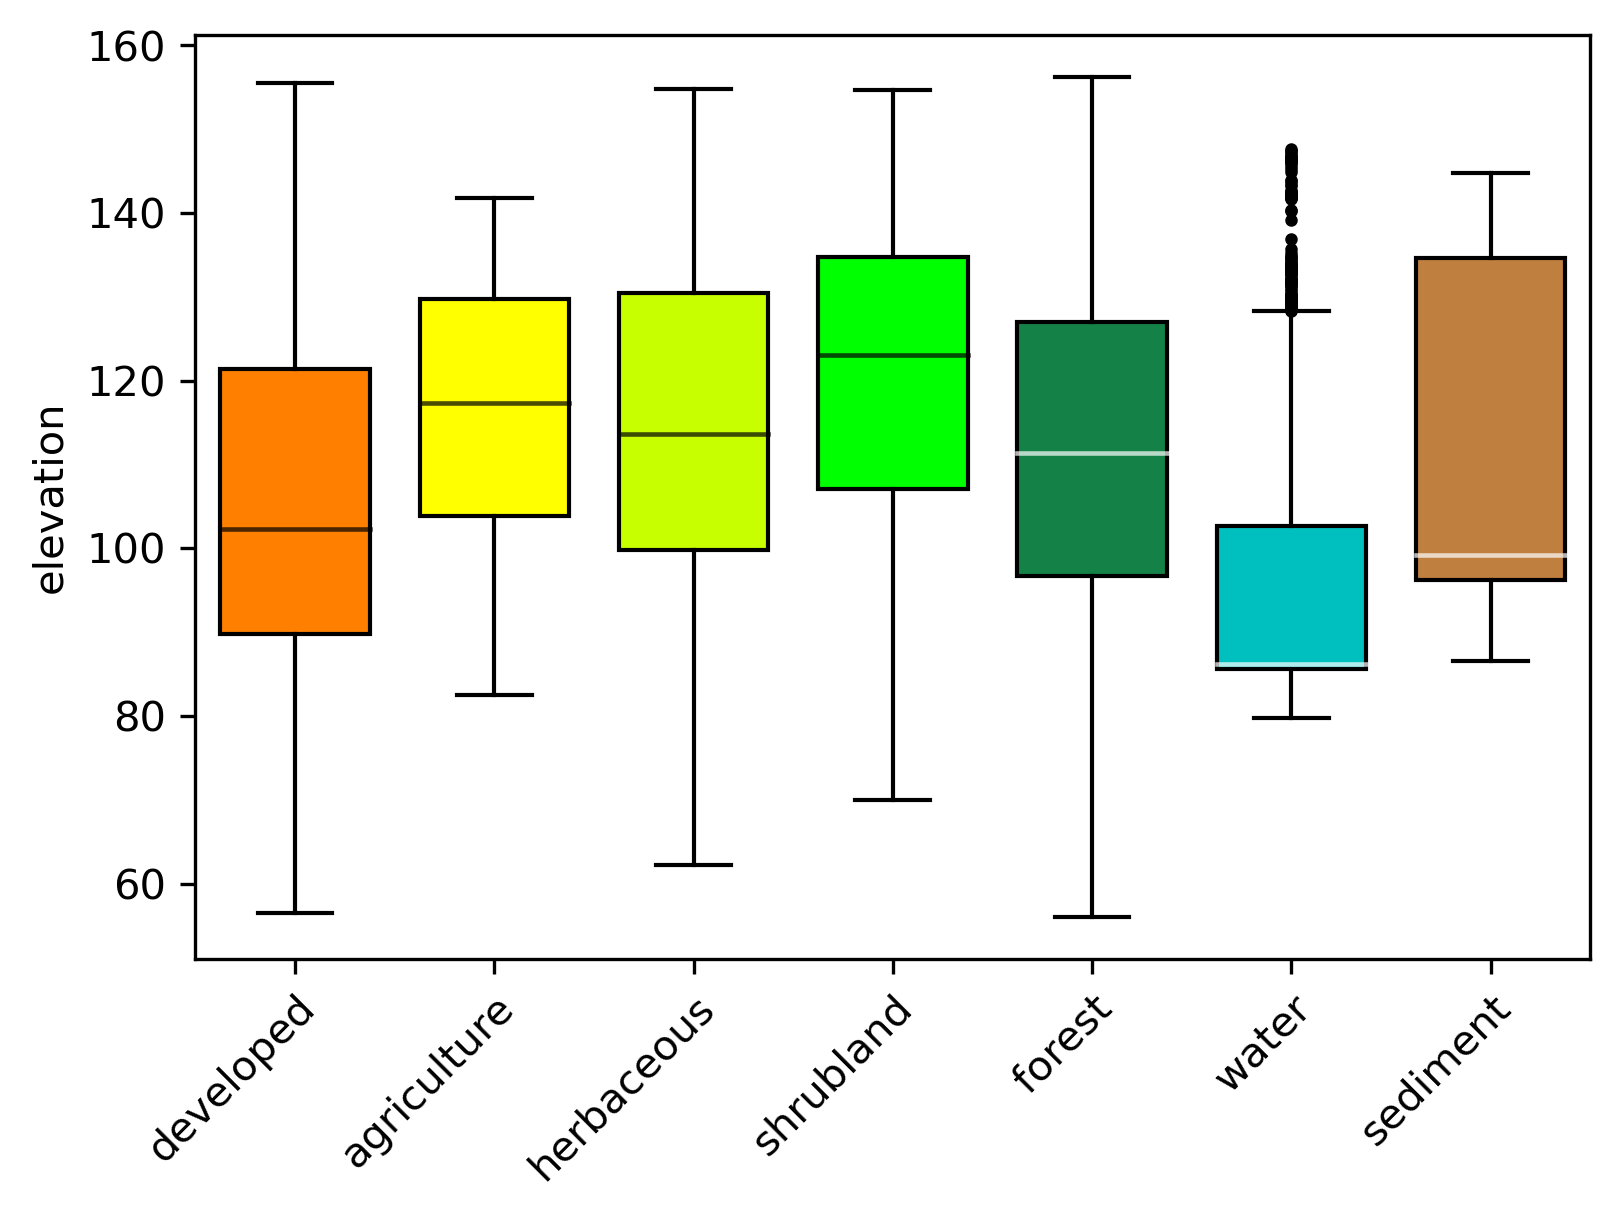

For more examples of the different options available in this addon, see
[this
tutorial](https://ecodiv.earth/post/drawing-boxplots-of-raster-values/#r.boxplot).

### [r.series.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/r.series.boxplot.html)

`r.series.boxplot` draws boxplots of a series of input raster maps that
might represent different times, spectral bands in satellite imagery or
other kind of variation. If users are interested in e.g., ploting the
spectral signature of different land cover classes, they can
alternatively set masks and recreate the boxplot series. Let’s see an
example for developed and forested classes.

# Bash

``` {bash}
# install the extension
g.extension extension=r.series.boxplot
# add landsat mapset to the list of accessible mapsets
g.mapsets mapset=landsat operation=add
# list of maps and labels
bands=`g.list type=raster pattern="lsat7_2000*" exclude="*6*,*8*" sep=comma`
labels="band1,band2,band3,band4,band5,band7"

r.mask raster=landclass96 maskcats=1
r.series.boxplot map=$bands bxcolor=grey text_labels=$labels output=r.series.boxplot_developed.png

r.mask -r 

r.mask raster=landclass96 maskcats=5
r.series.boxplot map=$bands bxcolor=grey \
  text_labels=$labels output=r.series.boxplot_forest.png
```

# Python

``` python
gs.run_command("g.extension", extension="r.series.boxplot")

gs.run_command("g.mapsets", mapset="landsat", operation="add")

bands = gs.list_grouped(type="raster", pattern="lsat7_2000*", exclude="*6*,*8*")["landsat"]
labels = ["band1", "band2", "band3", "band4", "band5", "band7"]

gs.run_command("r.mask", raster="landclass96", maskcats="1")
gs.run_command("r.series.boxplot", 
              map=bands, 
              bxcolor="grey", 
              text_labels=labels, 
              output="r.series.boxplot_developed.png")

gs.run_command("r.mask", flags="r")

gs.run_command("r.mask", raster="landclass96", maskcats="5")

gs.run_command("r.series.boxplot", 
              map=bands, 
              bxcolor="grey", 
              text_labels=labels, 
              output="r.series.boxplot_forested.png")
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%"
data-layout-align="left">
<figure>
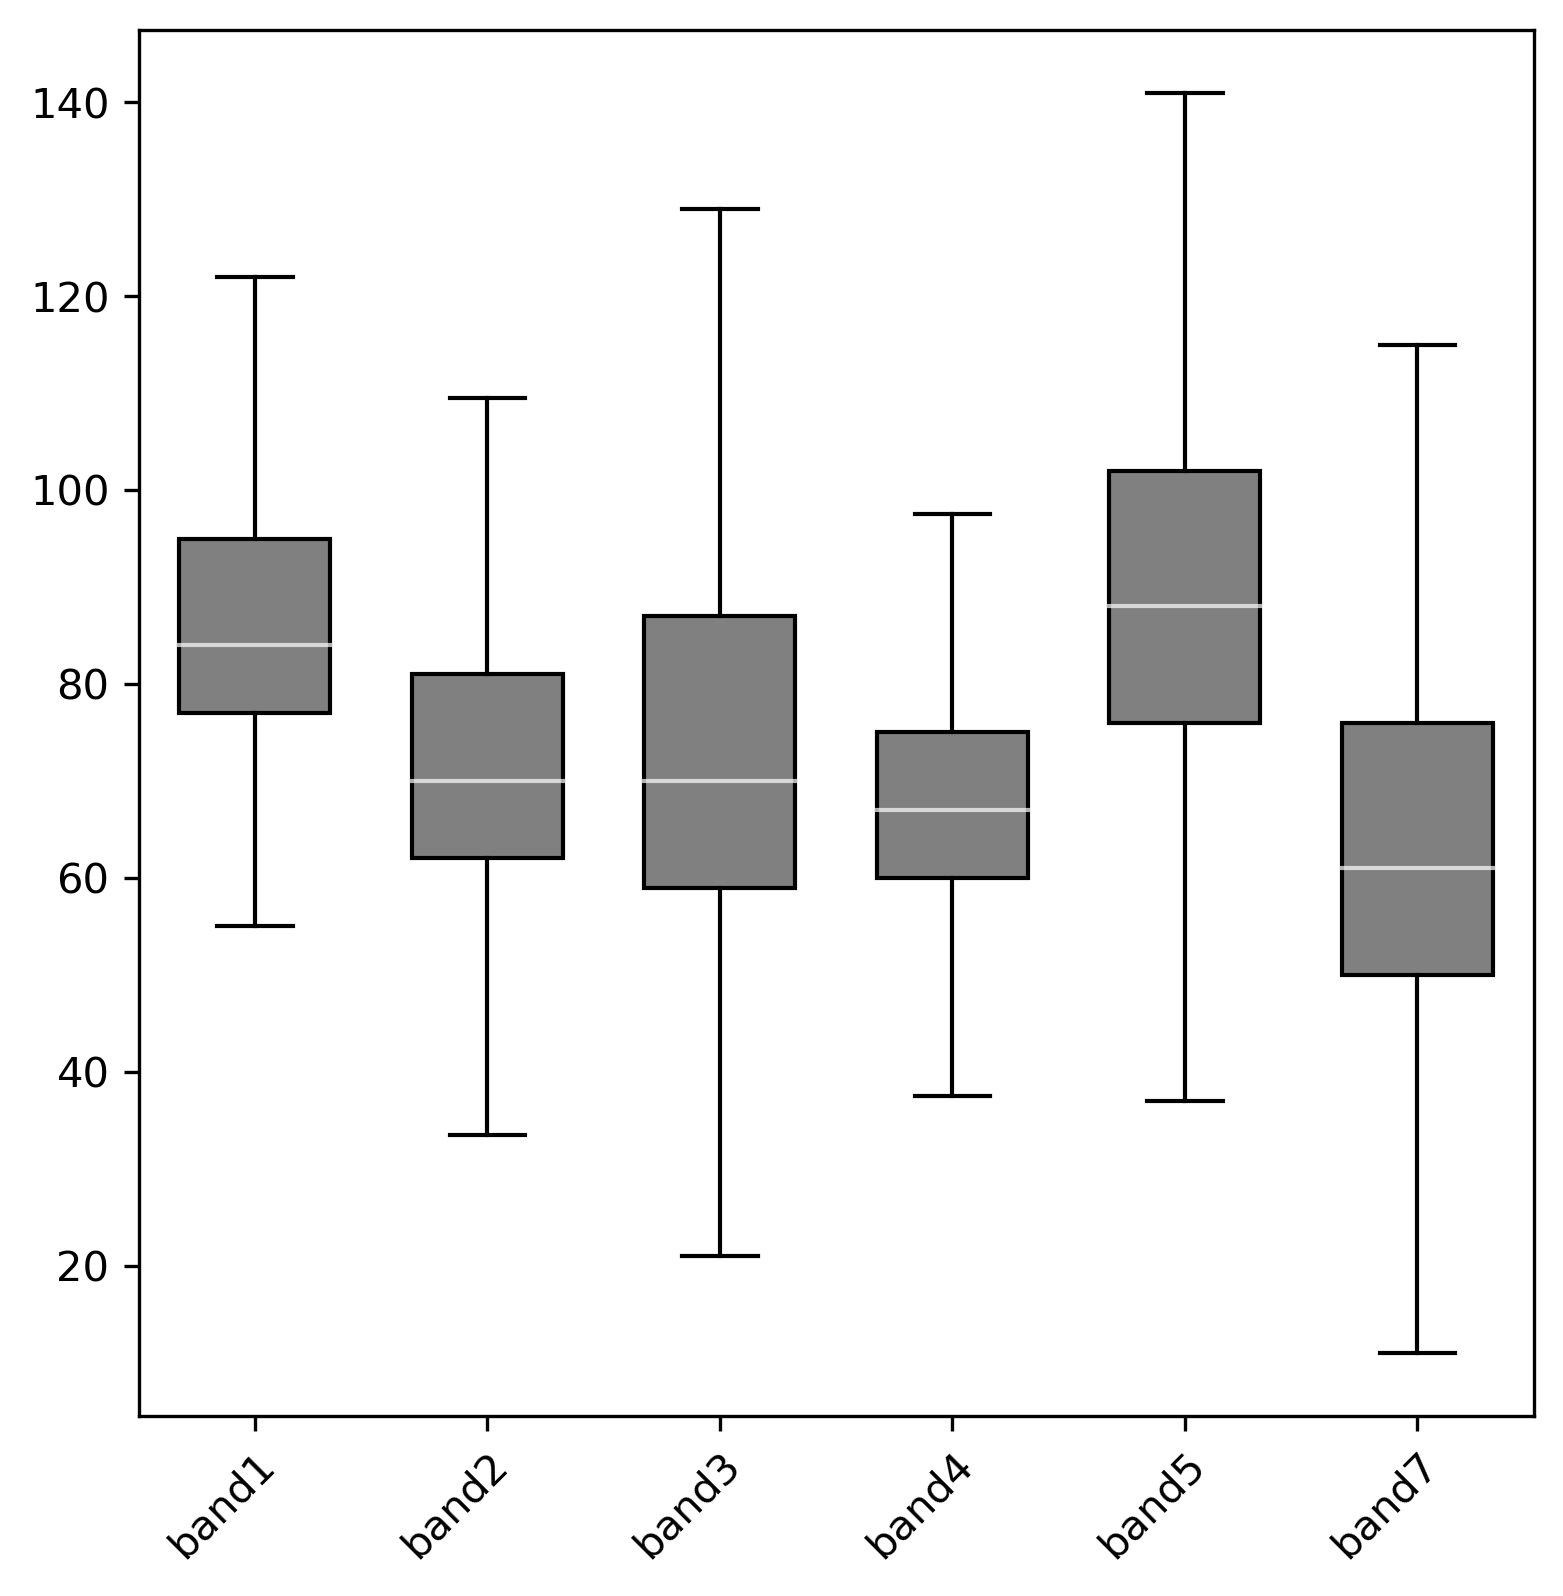
<figcaption aria-hidden="true">Class developed</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div width="50.0%"
data-layout-align="left">
<figure>
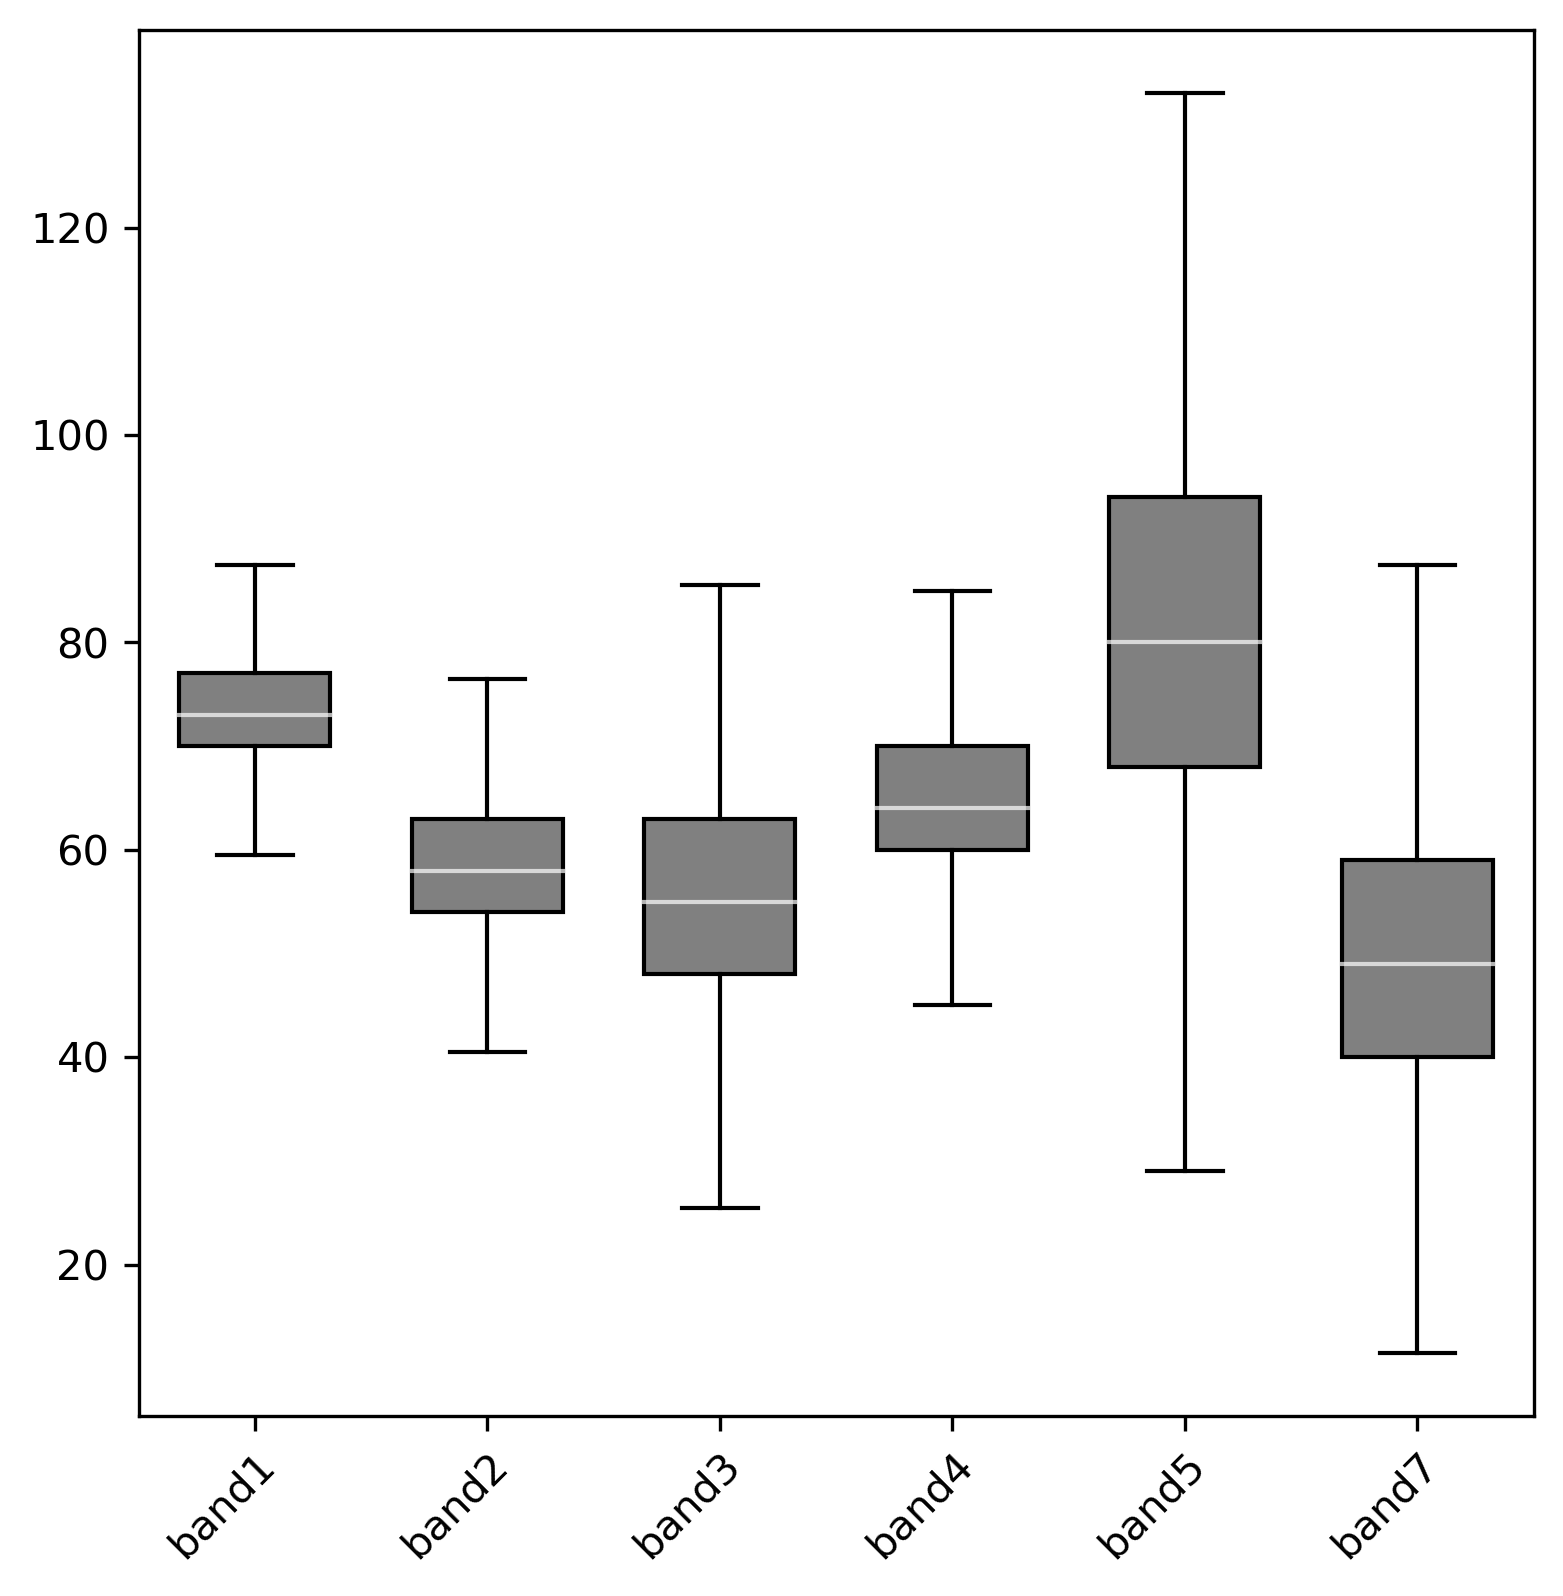
<figcaption aria-hidden="true">Class forest</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

## Vector plotting tools

### [v.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/v.boxplot.html)

`v.boxplot` draws the boxplot of values in a vector map attribute
column. It also provides an option to group by categories in a second
attribute column.

# Bash

``` {bash}
g.extension extension=v.boxplot

v.boxplot -r map=bridges column=WIDTH group_by=YEAR_BUILT where="YEAR_BUILT < '1920'" order=ascending output=boxplot_bridges_width_per_year.png
```

# Python

``` python
gs.run_command("g.extension", extension="v.boxplot")

gs.run_command("v.boxplot",
              map="bridges", 
              column="WIDTH", 
              group_by="YEAR_BUILT", 
              where="YEAR_BUILT < '1920'", 
              order="ascending", 
              output="boxplot_bridges_width_per_year.png", 
              flags="r")
```

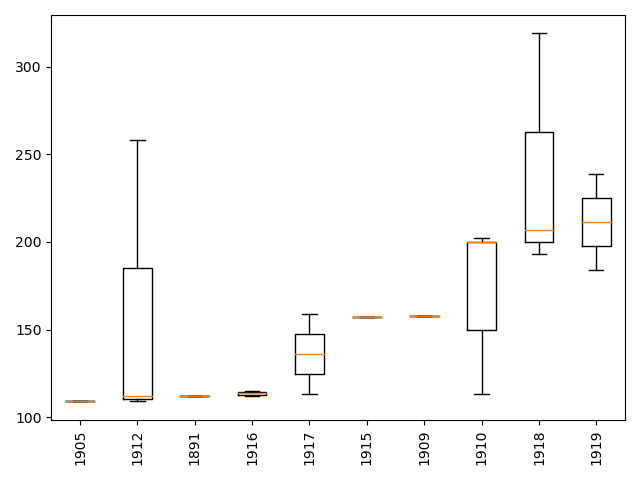

### [v.scatterplot](https://grass.osgeo.org/grass-stable/manuals/addons/v.scatterplot.html)

`v.scatterplot` creates a scatterplot with the values of two attribute
columns from a vector map. It provides many arguments to control
different plot features and it exposes some nice matplotlib
functionality to do bining, add trend lines and confidence ellipses.
While there’s
[r.scatterplot](https://grass.osgeo.org/grass-stable/manuals/addons/r.scatterplot.html)
for raster data, it does not create a plot but a vector map. Users can,
however, sample raster maps with a vector and then create scatterplots
from the sampled data.

# Bash

``` {bash}
g.extension extension=v.scatterplot

v.scatterplot map=bridges x=YEAR_BUILT y=WIDTH trendline=polynomial degree=1 line_color=red type=density bins=10,10 file_name=scatterplot_bridges_width_vs_year.png
```

# Python

``` python
gs.run_command("g.extension", extension="v.scatterplot")

gs.run_command("v.scatterplot", 
              map="bridges", 
              x="YEAR_BUILT", 
              y="WIDTH", 
              trendline="polynomial", 
              degree=1, 
              line_color="red", 
              type="density", 
              bins="10,10", 
              file_name="scatterplot_bridges_width_vs_year.png")
```

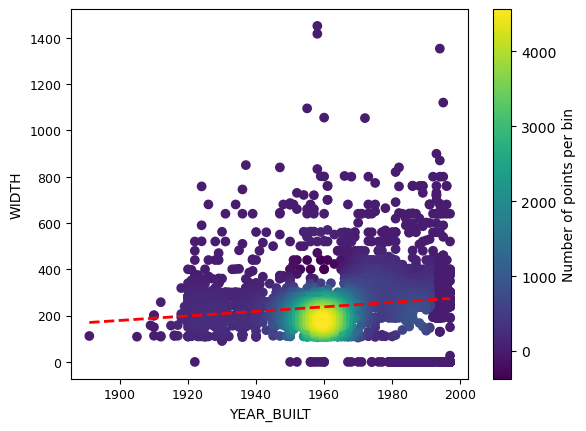

### [v.histogram](https://grass.osgeo.org/grass-stable/manuals/addons/v.histogram.html)

`v.histogram` draws a histogram of the values in a vector map attribute
column. The tool provides basic options to select values according to a
condition and set the number of bins.

# Bash

``` {bash}
g.extension extension=v.histogram

v.histogram map=bridges column=WIDTH where="YEAR_BUILT < '1940'" plot_output=histogram_bridges_width.png
```

# Python

``` python
gs.run_command("g.extension", extension="v.histogram")

gs.run_command("v.histogram", 
              map="bridges", 
              column="WIDTH", 
              where="YEAR_BUILT < '1940'", 
              plot_output="histogram_bridges_width.png")
```

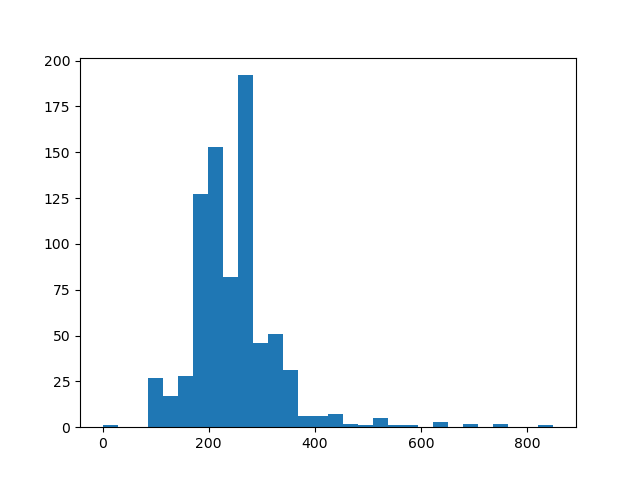

## Time series plotting tools

### [g.gui.tplot](https://grass.osgeo.org/grass-stable/manuals/g.gui.tplot.html)

`g.gui.tplot` is part of GRASS core distribution and it allows to plot
the values of raster and vector time series. Users can pass coordinate
pairs for the case of raster time series and ids plus attribute column
in the case of vector time series. The module also supports to display
the trend line based on a linear regression and the R-squared value,
visualize pop-up annotations, export the time series values to a text
file, among other. Let’s see an example for the MODIS LSD DAY monthly
raster time series.

# Bash

``` {bash}
g.region -p raster=MOD11B3.A2015001.h11v05.single_LST_Day_6km
g.gui.tplot -l strds=LST_Day_monthly coordinates=413831,196000 xlabel="Time" ylabel="LST (K*50)" output=LST_plot.png size=1000,800
```

# Python

``` python
gs.read_command("g.region", 
                raster="MOD11B3.A2015001.h11v05.single_LST_Day_6km")
                
gs.run_command("g.gui.tplot", 
              strds="LST_Day_monthly", 
              coordinates="413831,196000", 
              xlabel="Time", 
              ylabel="LST (K*50)", 
              output="LST_plot.png", 
              size="1000,800", 
              flags="l")
```

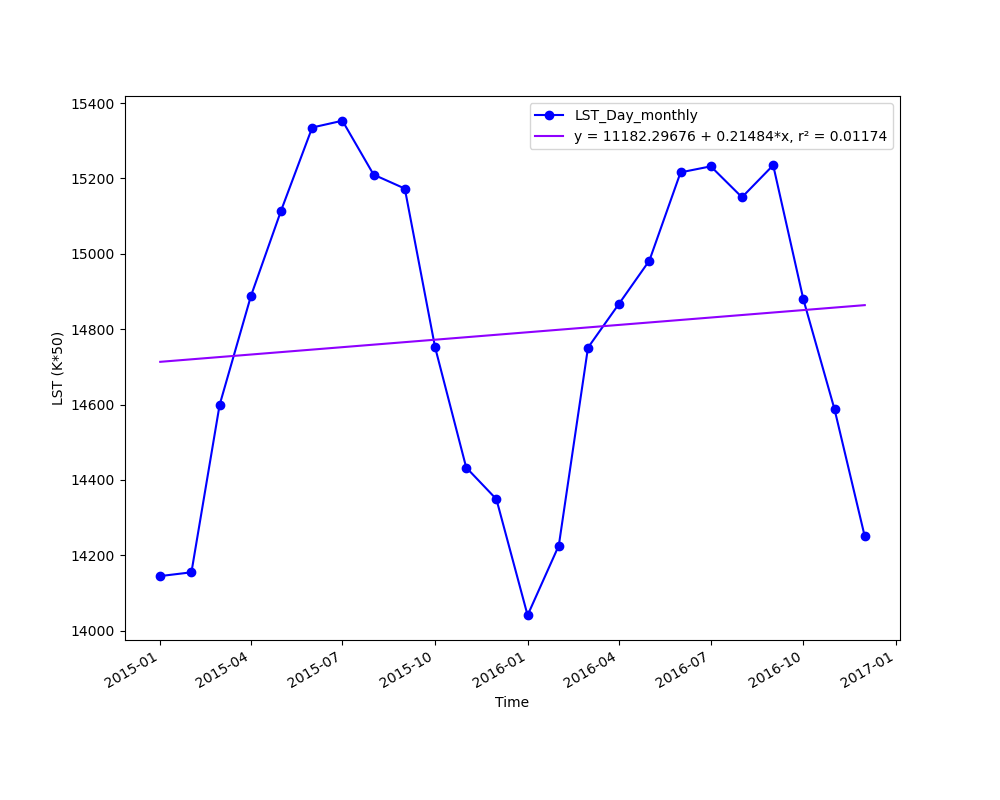

### [t.rast.boxplot](https://grass.osgeo.org/grass-stable/manuals/addons/t.rast.boxplot.html)

`t.rast.boxplot` draws boxplots from raster maps in a space-time raster
dataset, hence the x axis is determined by the STRDS temporal
granularity, i.e., day, week, month, etc. Let’s see an example for
plotting monthly LST within the state of North Carolina.

# Bash

``` {bash}
g.extension extension=t.rast.boxplot
g.region -p vector=boundary_county align=MOD11B3.A2015001.h11v05.single_LST_Day_6km
r.mask vector=boundary_county
t.rast.boxplot -o input=LST_Day_monthly dpi=300 rotate_labels=90 font_size=11 date_format="%Y-%m" bx_width=0.7 bx_color=195:194:194:255 flier_color=77:77:77:255
```

# Python

``` python
gs.run_command("g.extension", extension="t.rast.boxplot")

gs.read_command("g.region", vector="boundary_county", align="MOD11B3.A2015001.h11v05.single_LST_Day_6km")

gs.run_command("r.mask", vector="boundary_county")

gs.run_command("t.rast.boxplot", 
              input="LST_Day_monthly", 
              dpi="300", 
              rotate_labels=90, 
              font_size=11, 
              date_format="%Y-%m", 
              bx_width=0.7, 
              bx_color="195:194:194:255", 
              flier_color="77:77:77:255", 
              flags="o")
```

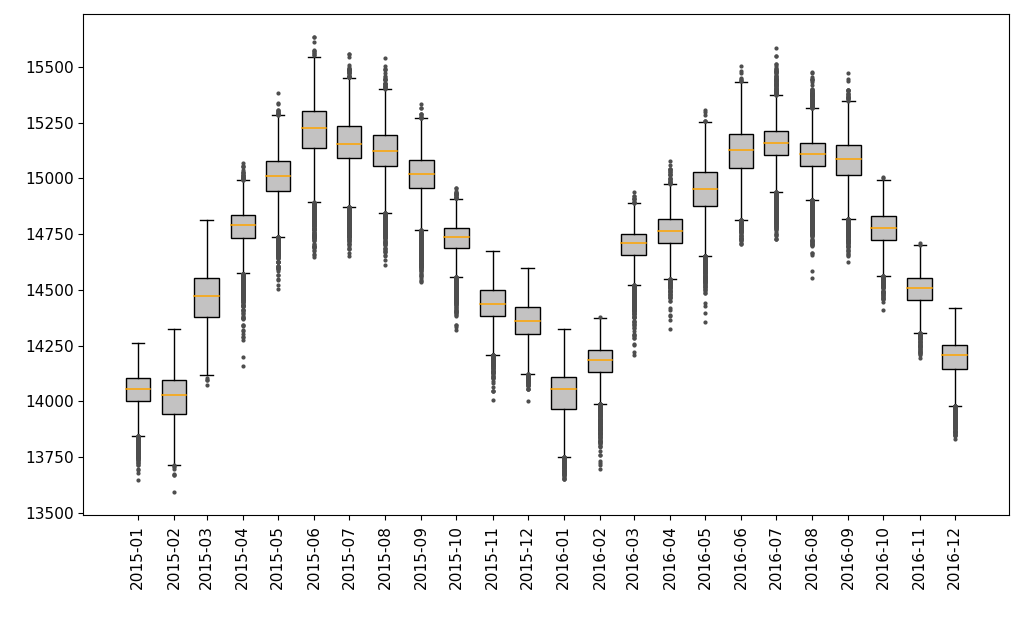

If users would like to compare boxplot time series representing
different areas, they could alternatively set masks for their areas of
interest and then create the respective boxplot time series.

# Bash

``` {bash}
r.mask vector=geology where="GEO_NAME LIKE '%Zat%'"
t.rast.boxplot -o input=LST_Day_monthly dpi=300 rotate_labels=90 font_size=11 date_format="%Y-%m" bx_width=0.7 bx_color=195:194:194:255 flier_color=77:77:77:255

r.mask -r

r.mask vector=geology where="GEO_NAME LIKE '%Qp%'"
t.rast.boxplot -o input=LST_Day_monthly dpi=300 rotate_labels=90 font_size=11 date_format="%Y-%m" bx_width=0.7 bx_color=195:194:194:255 flier_color=77:77:77:255
```

# Python

``` python
gs.run_command("r.mask", vector="geology", where="GEO_NAME LIKE '%Zat%'")

gs.run_command("t.rast.boxplot", 
              input="LST_Day_monthly", 
              dpi=300, 
              rotate_labels=90, 
              font_size=11, 
              date_format="%Y-%m", 
              bx_width=0.7, 
              bx_color="195:194:194:255", 
              flier_color="77:77:77:255", 
              flags="o")

gs.run_command("r.mask", flags="r")

gs.run_command("r.mask", vector="geology", where="GEO_NAME LIKE '%Qp%'")

gs.run_command("t.rast.boxplot", 
              input="LST_Day_monthly", 
              dpi=300, 
              rotate_labels=90, 
              font_size=11, 
              date_format="%Y-%m", 
              bx_width=0.7, 
              bx_color="195:194:194:255", 
              flier_color="77:77:77:255", 
              flags="o")
```

### [t.rast.line](https://grass.osgeo.org/grass-stable/manuals/addons/t.rast.line.html)

`t.rast.line` draws line plots from raster maps in a space-time raster
dataset and also allows to pass a zonal map to compare average temporal
changes of different areas of interest in the same plot.

# Bash

``` {bash}
g.extension extension=t.rast.line
t.rast.line input=LST_Day_monthly zones=boundary_county_500m y_label="LST (K*50)" date_format=%Y-%m
```

# Python

``` python
gs.run_command("g.extension", extension="t.rast.line")

gs.run_command("t.rast.line", 
              input="LST_Day_monthly", 
              zones="boundary_county_500m", 
              y_label="LST (K*50)", 
              date_format="%Y-%m")
```

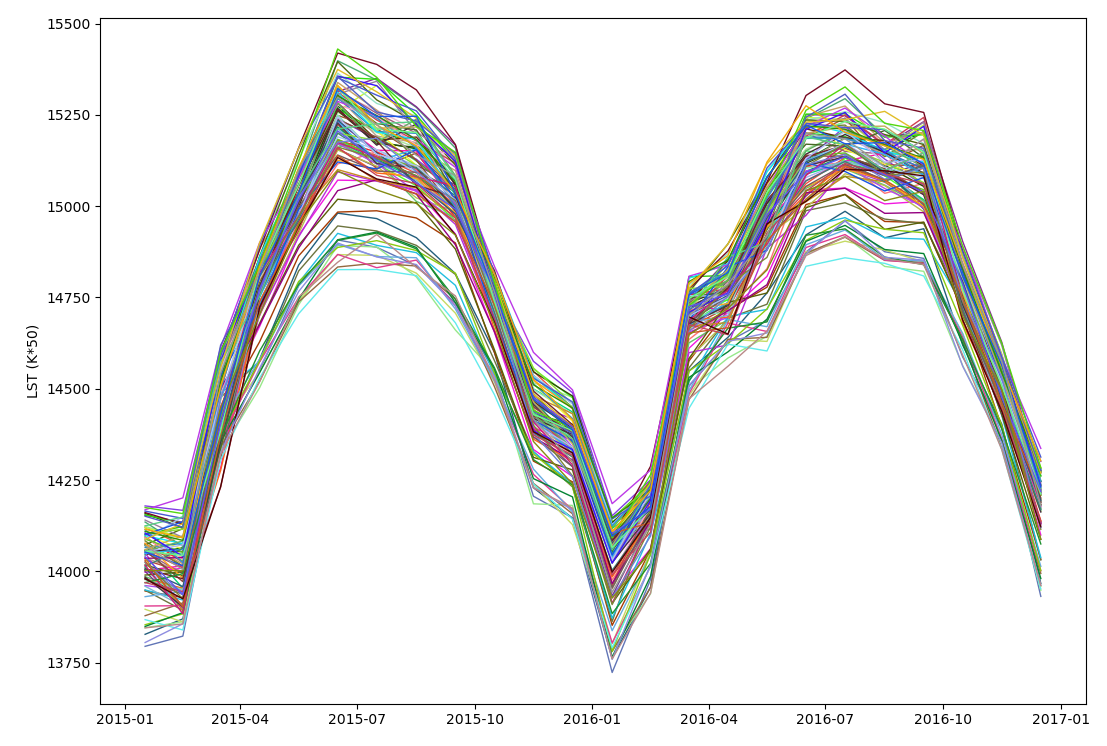